차근차근 코드 작성하며 원하는 기능을 추가하거나 제거하는 연습 하는 단계입니다.

# streamlit 작동 test

홈페이지 주소 : 

In [3]:
%%writefile test.py

import streamlit as st

st.write("Hello, *World!* :sunglasses:")

Writing test.py


# clone ChatGPT 로직 순서

# 기본 채팅 페이지 만들기

In [1]:
%%writefile main.py

# 1. 화면 띄우기
import streamlit as st 

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

# 2. 사용자의 메세지 입력 받기
user_input = st.chat_input("메세지를 입력해주세요.")
if user_input : # True
    st.chat_message("user").write(f"{user_input}") # 공식 문서 Chat elements -> chat_message (또는 검색)

# 3. 입력된 메세지를 AI가(llm으로) 처리하여 화면에 표현하기
    with st.chat_message("assistant"):
        st.write(f"당신이 입력한 내용 : {user_input}")

# 결과: 하이, 헬로우 순서대로 입력 했을 때 페이지가 초기화 되어 메세지가 출력됨

Overwriting main.py


# 메세지 연속으로 쌓기(캐싱하기)

스트림릿은 어떤 메세지를 입력하면 코드가 처음부터 끝까지 재실행되면서 페이지 새로고침이 일어납니다.

때문에, 세션 스테이트를 사용하여 메세지를 (리스트)변수에 저장하는 방식으로 기록해야 합니다. 

In [6]:
%%writefile main.py

import streamlit as st 

# 1. 화면 띄우기
st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

# 4. 세션 스테이트 사용해서 messages를 기록해주기
if "message" not in st.session_state:
    st.session_state["messages"] = [] # 공식 문서 Cashing and state -> st.session_state (또는 검색)
                                     # key("messages"), value([]) 형태로 들어감

# 5. 먼저 "messages"(key)안에 있는 내용(value)을 전부 출력하기 
# 이전 대화기록을 출력
if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
    for role, message in st.session_state["messages"]: 
        st.chat_message(role).write(message) # 아래 출력 형식과 동일

# 2. 사용자의 메세지 입력 받기
user_input = st.chat_input("메세지를 입력해주세요.")
if user_input : # True
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(("user", user_input)) # 튜플 형식

# 3. 입력된 메세지를 AI가(llm으로) 처리하여 화면에 표현하기
    with st.chat_message("assistant"): # with 구문은 언제 사용됨?
        assistant_output = f"당신이 입력한 내용 : {user_input}"
        st.write(assistant_output)
        st.session_state["messages"].append(("assistant", assistant_output))

# 결과시연 : 하이, 헬로우 순서대로 입력 했을 때 페이지가 초기화 되어 메세지가 출력됨

Overwriting main.py


## 출력 코드 깔끔하게 수정하기

#### 함수 만들기

In [16]:
%%writefile utils.py

# 5. 먼저 "messages"(key)안에 있는 내용(value)을 전부 출력하기 
import streamlit as st

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for role, message in st.session_state["messages"]: 
            st.chat_message(role).write(message) # 아래 출력 형식과 동일

Overwriting utils.py


#### 메세지 연속으로 쌓기 - 만든 함수 적용하기

In [17]:
%%writefile main.py

import streamlit as st 
from utils import print_messages

# 1. 화면 띄우기
st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

# 4. 세션 스테이트 사용해서 messages를 기록해주기
if "messages" not in st.session_state:
    st.session_state["messages"] = [] # 공식 문서 Cashing and state -> st.session_state (또는 검색)
                                     # key("messages"), value([]) 형태로 들어감

# 5. 먼저 "messages"(key)안에 있는 내용(value)을 전부 출력하기
# 이전 대화기록을 출력
print_messages()

# 2. 사용자의 메세지 입력 받기
user_input = st.chat_input("메세지를 입력해주세요.")
if user_input: # True
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(("user", user_input)) # 튜플 형식

# 3. 입력된 메세지를 AI가(llm으로) 처리하여 화면에 표현하기
    with st.chat_message("assistant"): # with 구문은 언제 사용됨?
        assistant_output = f"당신이 입력한 내용 : {user_input}"
        st.write(assistant_output)
        st.session_state["messages"].append(("assistant", assistant_output))

# 결과시연 : 하이, 헬로우 순서대로 입력 했을 때 페이지가 초기화 되어 메세지가 출력됨

Overwriting main.py


## 메세지들을 ChatMessage객체 사용하여 출력하기

시스템에서 메모리를 보관하는 건 아니기 때문에 뒤에서 추가로 구현해줄 것입니다.

In [21]:
%%writefile utils.py

import streamlit as st

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]: 
            st.chat_message(chat_message.role).write(chat_message.content) # 객체로 변환

Overwriting utils.py


In [23]:
%%writefile main.py

import streamlit as st 
from utils import print_messages
from langchain_core.messages import ChatMessage # 튜플 형식 대신 객체화 하여 사용 
                                                
st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = [] 

print_messages() # utils.py 

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input : # True
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input)) # 객체로 변환

    with st.chat_message("assistant"): 
        assistant_output = f"당신이 입력한 내용 : {user_input}"
        st.write(assistant_output)
        st.session_state["messages"].append(ChatMessage(role="assistant", content=assistant_output)) # 객체로 변환

Overwriting main.py


# LLM 모델 적용하기

### .stramlit 폴더 설정

.streamlit 폴더는 Streamlit 앱에서 필요한 설정 파일들을 관리하는 폴더입니다.

secrets.toml 파일은 보통 비밀번호, API 키와 같은 민감한 정보를 외부에 노출되지 않도록 저장하는 데 사용됩니다. 

기존 방식인 dotenv를 사용해도 전혀 문제 없습니다. 

.env 파일을 사용하여 환경 변수를 관리하는 방식도 많이 사용되는 안전한 방법입니다. 

다만, Streamlit의 secrets.toml 파일을 사용하는 방식은 특히 Streamlit 앱 환경에서 권장되는 방식일 뿐입니다.

정리하자면, 

dotenv를 사용하는 방식: Python 전반에서 범용적으로 사용하기 적합합니다.

secrets.toml 방식: Streamlit 앱 내에서 간편하고 안전하게 환경 변수를 관리하기에 적합합니다.

In [16]:
%%writefile main.py

# 6. 가장 단순한 LLM 적용하기
import streamlit as st 
from utils import print_messages
from langchain_core.messages import ChatMessage # 튜플 형식 대신 객체화 하여 사용
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# # openAI API key 추가
# import os 
# # os.environ["OPENAI_API_KEY"] = st.secrets["OPENAI_API_KEY"]

from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = [] 

print_messages() # utils.py 

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:  # True
    # 사용자가 입력한 내용
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))  # 객체로 변환

    # LLM을 사용하여 AI의 답변을 생성
    prompt = ChatPromptTemplate.from_template(
        """
        질문에 대하여 간결하게 답변해주세요.
        {question}
        """
    )

    # 체인 구조 정의 및 실행
    llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo', api_key=api_key)
    chain = prompt | llm | StrOutputParser()
    assistant_output = chain.invoke({"question": user_input})

    # AI의 답변
    with st.chat_message("assistant"): 
        st.write(assistant_output)
        st.session_state["messages"].append(ChatMessage(role="assistant", content=assistant_output))  # 객체로 변환


Overwriting main.py


### 현재까지의 결과

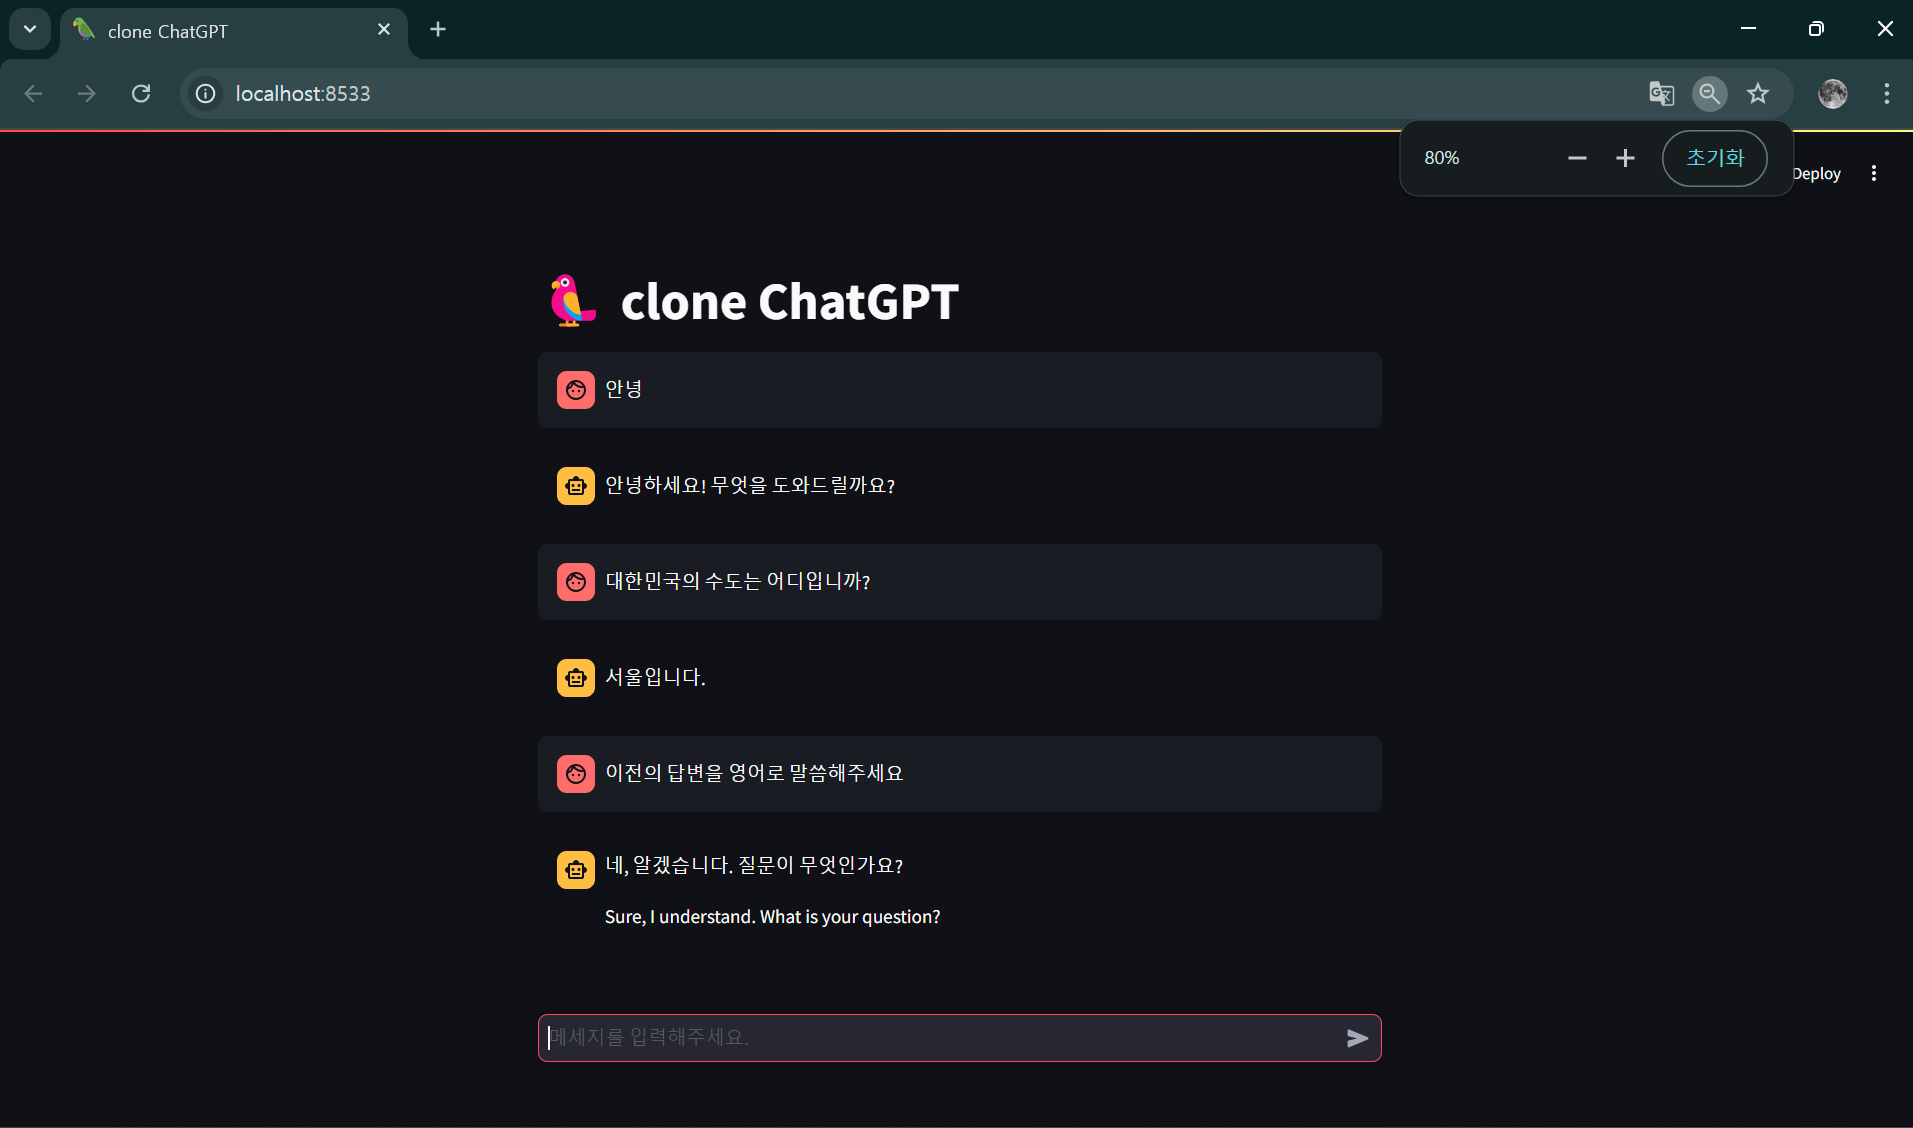

메세지가 연속적으로 눈에 보이지만 시스템적으로 메세지를 보관하고 있지 않습니다.

이는 메모리 기능을 사용해야만 하는데, RunnableWithMessageHistory 로 해결할 수 있습니다.

# 메모리의 메세지들에 LLM 적용하기

In [42]:
%%writefile utils.py

import streamlit as st
from langchain_core.chat_history import BaseChatMessageHistory 
from langchain_community.chat_message_histories import ChatMessageHistory

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]: 
            st.chat_message(chat_message.role).write(chat_message.content) # 객체로 변환


store = {} # 세션 기록을 저장할 딕셔너리

# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    print(session_id)
    if session_id not in store:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_id] = ChatMessageHistory()
    return store[session_id]  # 해당 세션 ID에 대한 세션 기록 반환

Overwriting utils.py


In [44]:
%%writefile main.py

import streamlit as st 
from utils import print_messages, get_session_history
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import ChatMessage  # 객체화된 메시지 사용
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 환경 변수 설정
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = [] 

print_messages()  # utils.py에서 메시지 출력

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:
    # 사용자의 입력 저장
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))

    # 1) 모델 생성
    llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo', api_key=api_key)

    # 2) 프롬프트 생성
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", "질문에 짧고 간결하게 답변해 주세요."),
            MessagesPlaceholder(variable_name="history"),  # 대화 기록 사용
            ("human", "{question}")  # 사용자 질문 입력
        ]
    )

    chain = prompt | llm 

    # 3) 메모리 적용한 체인 생성
    chain_with_memory = RunnableWithMessageHistory(
        chain,  # 실행할 Runnable 객체
        get_session_history,  # 세션 기록을 가져오는 함수
        input_messages_key="question",  # 사용자 질문의 키
        history_messages_key="history",  # 기록 메시지의 키
    )

    # 4) AI 응답 생성
    response = chain_with_memory.invoke(
        {"question": user_input},
        config={"configurable": {"session_id": "abc123"}}
    )

    assistant_output = response.content

    # AI의 답변 출력
    with st.chat_message("assistant"):
        st.write(assistant_output)
        st.session_state["messages"].append(ChatMessage(role="assistant", content=assistant_output))

Overwriting main.py


세션 기록을 상태 변수에 저장하는 코드로 변경합니다.

In [46]:
%%writefile utils.py

import streamlit as st
from langchain_core.chat_history import BaseChatMessageHistory 
from langchain_community.chat_message_histories import ChatMessageHistory

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]: 
            st.chat_message(chat_message.role).write(chat_message.content) # 객체로 변환


# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids: str) -> BaseChatMessageHistory:
    if session_ids not in st.session_state["store"]:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        st.session_state["store"][session_ids] = ChatMessageHistory()
    return st.session_state["store"][session_ids]  # 해당 세션 ID에 대한 세션 기록 반환

Overwriting utils.py


In [47]:
%%writefile main.py

# 7. 메모리의 메세지들에 LLM 적용하기
import streamlit as st 
from utils import print_messages, get_session_history
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import ChatMessage  # 객체화된 메시지 사용
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 환경 변수 설정
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = [] 

# 채팅 대화 기록을 저장하는 store 세션 상태 변수
if "store" not in st.session_state:
    st.session_state["store"] = dict()

print_messages()  # utils.py에서 메시지 출력

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:
    # 사용자의 입력 저장
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))

    # 1) 모델 생성
    llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo', api_key=api_key)

    # 2) 프롬프트 생성
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", "질문에 짧고 간결하게 답변해 주세요."),
            MessagesPlaceholder(variable_name="history"),  # 대화 기록 사용
            ("human", "{question}")  # 사용자 질문 입력
        ]
    )

    chain = prompt | llm 

    # 3) 메모리 적용한 체인 생성
    chain_with_memory = RunnableWithMessageHistory(
        chain,  # 실행할 Runnable 객체
        get_session_history,  # 세션 기록을 가져오는 함수
        input_messages_key="question",  # 사용자 질문의 키
        history_messages_key="history",  # 기록 메시지의 키
    )

    # 4) AI 응답 생성
    response = chain_with_memory.invoke(
        {"question": user_input},
        config={"configurable": {"session_id": "abc123"}}
    )

    assistant_output = response.content

    # AI의 답변 출력
    with st.chat_message("assistant"):
        st.write(assistant_output)
        st.session_state["messages"].append(ChatMessage(role="assistant", content=assistant_output))


Overwriting main.py


### 수정된 결과

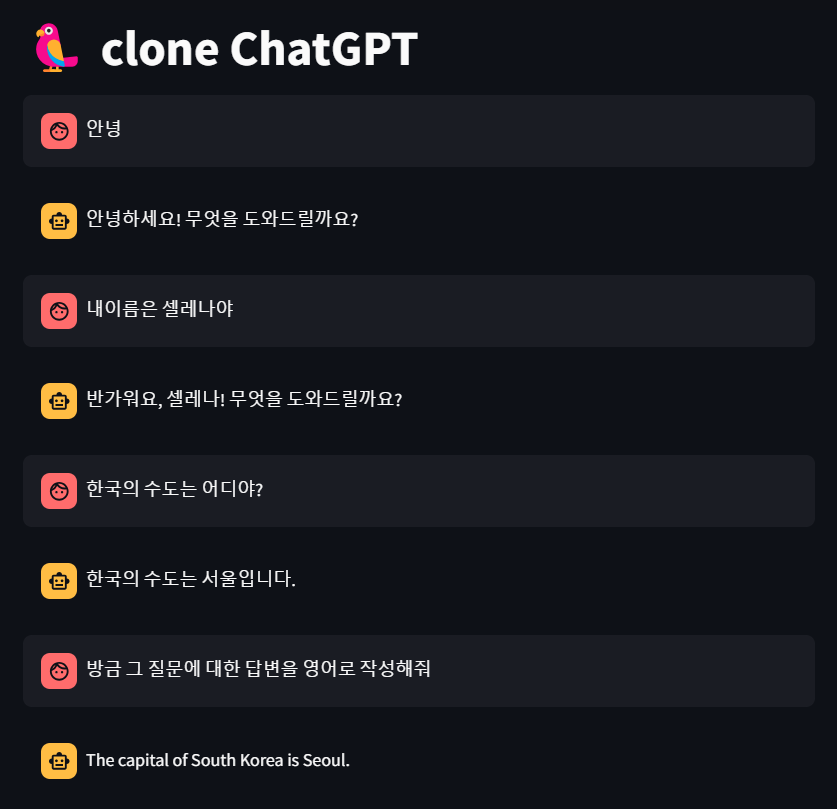

# 스트리밍 기능 구현하기

In [63]:
%%writefile utils.py

import streamlit as st
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory

class StreamHandler(BaseCallbackHandler):
    def __init__(self, container, initial_text=""):
        self.container = container
        self.text = initial_text

    def on_llm_new_token(self, token: str, **kwargs) -> None:
        self.text += token
        self.container.markdown(self.text)

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]:
            st.chat_message(chat_message.role).write(chat_message.content)

# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in st.session_state["store"]:  # 세션 ID가 store에 없는 경우
        st.session_state["store"][session_id] = ChatMessageHistory()  # 새 기록 생성
    return st.session_state["store"][session_id]  # 해당 세션 ID에 대한 기록 반환


Overwriting utils.py


In [64]:
%%writefile main.py

import streamlit as st 
from utils import print_messages, get_session_history, StreamHandler
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import ChatMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 환경 변수 설정
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = []

# 채팅 대화 기록을 저장하는 store 세션 상태 변수
if "store" not in st.session_state:
    st.session_state["store"] = dict()

print_messages()  # 이전 메시지 출력

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:
    # 사용자의 입력 저장
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))

    # 5) AI의 답변 출력
    with st.chat_message("assistant"):
        stream_handler = StreamHandler(st.empty())

        # LLM을 사용하여 AI의 답변을 생성
        # 1) 모델 생성
        llm = ChatOpenAI(
            temperature=0, 
            model_name='gpt-4-turbo', 
            api_key=api_key, 
            streaming=True, 
            callbacks=[stream_handler]
        )

        # 2) 프롬프트 생성
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "질문에 짧고 간결하게 답변해 주세요."),
                MessagesPlaceholder(variable_name="history"),  # 대화 기록 사용
                ("human", "{question}")  # 사용자 질문 입력
            ]
        )

        chain = prompt | llm 

        # 3) 메모리 적용한 체인 생성
        chain_with_memory = RunnableWithMessageHistory(
            chain,  # 실행할 Runnable 객체
            get_session_history,  # 세션 기록을 가져오는 함수
            input_messages_key="question",  # 사용자 질문의 키
            history_messages_key="history",  # 기록 메시지의 키
        )

        # 4) AI 응답 생성
        response = chain_with_memory.invoke(
            {"question": user_input},
            config={"configurable": {"session_id": "abc123"}}
        )

        # 6) 토큰 하나하나 당 스트리밍으로 결과 출력
        st.session_state["messages"].append(ChatMessage(role="assistant", content=response.content))


Overwriting main.py


### 구현 결과

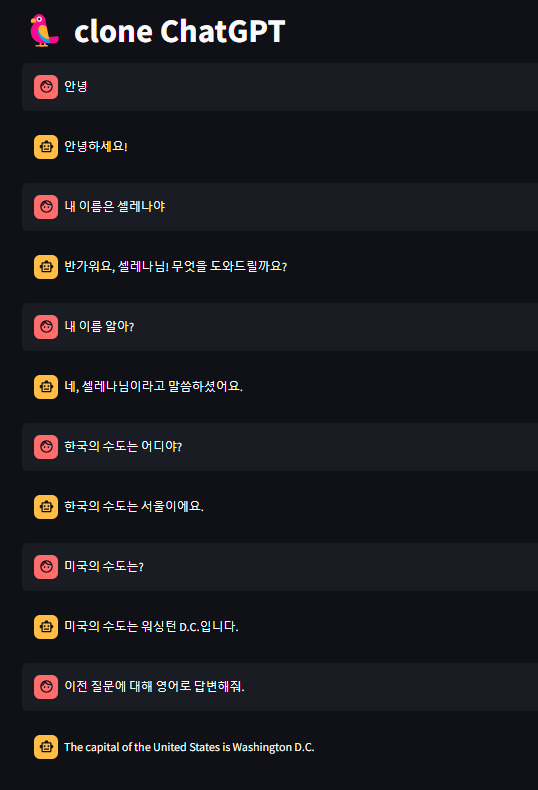

# 대화 세션 ID 만들기

추가로 대화 내역 클리어 버튼 만들기

In [17]:
%%writefile utils.py

import streamlit as st
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory

class StreamHandler(BaseCallbackHandler):
    def __init__(self, container, initial_text=""):
        self.container = container
        self.text = initial_text

    def on_llm_new_token(self, token: str, **kwargs) -> None:
        self.text += token
        self.container.markdown(self.text)

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]:
            st.chat_message(chat_message.role).write(chat_message.content)

# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in st.session_state["store"]:  # 세션 ID가 store에 없는 경우
        st.session_state["store"][session_id] = ChatMessageHistory()  # 새 기록 생성
    return st.session_state["store"][session_id]  # 해당 세션 ID에 대한 기록 반환


Overwriting utils.py


In [18]:
%%writefile main.py

import streamlit as st 
from utils import print_messages, get_session_history, StreamHandler
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import ChatMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 환경 변수 설정
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = []

# 채팅 대화 기록을 저장하는 store 세션 상태 변수
if "store" not in st.session_state:
    st.session_state["store"] = dict()

# 세션 ID 지정하는 사이드바 만들기
with st.sidebar:
    session_id = st.text_input("Session ID", value = "abc123")
    # 대화기록 초기화 하는 기능 추가하기
    clear_btn = st.button("대화기록 초기화")
    if clear_btn:
        st.session_state["messages"] = []
        # st.session_state["store"] = dict() # 대화 기록 저장한 것 까지 초기화 하려면 추가하면 됨
        st.rerun()

print_messages()  # 이전 메시지 출력

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:
    # 사용자의 입력 저장
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))

    # 5) AI의 답변 출력
    with st.chat_message("assistant"):
        stream_handler = StreamHandler(st.empty())

        # LLM을 사용하여 AI의 답변을 생성
        # 1) 모델 생성
        llm = ChatOpenAI(
            temperature=0, 
            model_name='gpt-4-turbo', 
            api_key=api_key, 
            streaming=True, 
            callbacks=[stream_handler]
        )

        # 2) 프롬프트 생성
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "질문에 짧고 간결하게 답변해 주세요."),
                MessagesPlaceholder(variable_name="history"),  # 대화 기록 사용
                ("human", "{question}")  # 사용자 질문 입력
            ]
        )

        chain = prompt | llm 

        # 3) 메모리 적용한 체인 생성
        chain_with_memory = RunnableWithMessageHistory(
            chain,  # 실행할 Runnable 객체
            get_session_history,  # 세션 기록을 가져오는 함수
            input_messages_key="question",  # 사용자 질문의 키
            history_messages_key="history",  # 기록 메시지의 키
        )

        # 4) AI 응답 생성
        response = chain_with_memory.invoke(
            {"question": user_input},
            config={"configurable": {"session_id": session_id}}
        )

        # 6) 토큰 하나하나 당 스트리밍으로 결과 출력
        st.session_state["messages"].append(ChatMessage(role="assistant", content=response.content))


Overwriting main.py


# DB에 저장해서 채팅 기록 불러오기 (진행중)

Redis 라는 데이터 베이스에 저장해서 불러오면 됩니다.

기존에 연결할 Redis 배포가 없는 경우, 로컬 Redis Stack 서버를 시작합니다.

다음은 Docker 로 Redis 서버를 구동하는 명령어입니다.

docker run -d -p 6379:6379 -p 8001:8001 redis/redis-stack:latest

REDIS_URL 변수에 Redis 데이터베이스의 연결 URL을 할당합니다.

In [ ]:
%%writefile utils.py

import streamlit as st
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_community.chat_message_histories import RedisChatMessageHistory  # RedisChatMessageHistory 추가
import os

# Redis 서버의 URL을 지정합니다.
REDIS_URL = "redis://localhost:6379/0"

class StreamHandler(BaseCallbackHandler):
    def __init__(self, container, initial_text=""):
        self.container = container
        self.text = initial_text

    def on_llm_new_token(self, token: str, **kwargs) -> None:
        self.text += token
        self.container.markdown(self.text)

def print_messages():
    if "messages" in st.session_state and len(st.session_state["messages"]) > 0:
        for chat_message in st.session_state["messages"]:
            st.chat_message(chat_message.role).write(chat_message.content)

# Redis를 사용하여 세션 기록을 가져오는 함수
def get_redis_message_history(session_id: str) -> RedisChatMessageHistory:
    return RedisChatMessageHistory(session_id, url=REDIS_URL)

# 기존의 세션 기록 가져오기 함수
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in st.session_state["store"]:
        st.session_state["store"][session_id] = ChatMessageHistory()  # 새 기록 생성
    return st.session_state["store"][session_id]

In [ ]:
%%writefile main.py

import streamlit as st 
from utils import print_messages, get_session_history, get_redis_message_history, StreamHandler
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import ChatMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 환경 변수 설정
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ["OPENAI_API_KEY"]

st.set_page_config(page_title="clone ChatGPT", page_icon="🦜")
st.title("🦜 clone ChatGPT")

if "messages" not in st.session_state:
    st.session_state["messages"] = []

# 채팅 대화 기록을 저장하는 store 세션 상태 변수
if "store" not in st.session_state:
    st.session_state["store"] = dict()

# 세션 ID 지정하는 사이드바 만들기
with st.sidebar:
    session_id = st.text_input("Session ID", value="abc123")
    # 대화기록 초기화하는 기능 추가
    clear_btn = st.button("대화기록 초기화")
    if clear_btn:
        st.session_state["messages"] = []
        # st.session_state["store"] = dict()  # 대화 기록 저장한 것까지 초기화하려면 활성화
        st.experimental_rerun()

print_messages()  # 이전 메시지 출력

user_input = st.chat_input("메세지를 입력해주세요.")
if user_input:
    # 사용자의 입력 저장
    st.chat_message("user").write(f"{user_input}")
    st.session_state["messages"].append(ChatMessage(role="user", content=user_input))

    # 5) AI의 답변 출력
    with st.chat_message("assistant"):
        stream_handler = StreamHandler(st.empty())

        # LLM을 사용하여 AI의 답변을 생성
        # 1) 모델 생성
        llm = ChatOpenAI(
            temperature=0, 
            model_name='gpt-4-turbo', 
            api_key=api_key, 
            streaming=True, 
            callbacks=[stream_handler]
        )

        # 2) 프롬프트 생성
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "질문에 짧고 간결하게 답변해 주세요."),
                MessagesPlaceholder(variable_name="history"),  # 대화 기록 사용
                ("human", "{question}")  # 사용자 질문 입력
            ]
        )

        chain = prompt | llm 

        # 3) Redis 메모리 적용한 체인 생성
        chain_with_memory = RunnableWithMessageHistory(
            chain,  # 실행할 Runnable 객체
            get_redis_message_history,  # Redis 기반 세션 기록을 가져오는 함수
            input_messages_key="question",  # 사용자 질문의 키
            history_messages_key="history",  # 기록 메시지의 키
        )

        # 4) AI 응답 생성
        response = chain_with_memory.invoke(
            {"question": user_input},
            config={"configurable": {"session_id": session_id}}
        )

        # 6) 토큰 하나하나 당 스트리밍으로 결과 출력
        st.session_state["messages"].append(ChatMessage(role="assistant", content=response.content))
